<a href="https://colab.research.google.com/github/MilagrosEsquen01/IDAT_VI_IA/blob/main/IDAT_IA_Semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Inteligencia Artificial aplicada a la Robótica:**
*Regresión Múltiple con Redes Neuronales*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd                 #datasets
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential, layers

In [ ]:
#Enlazar colab con drive

from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/IDAT/IA 23 IIE/Datasets/Precio_Depas.xlsx"

df=pd.read_excel(path,sheet_name="Lince")
dataset=df.copy()
dataset.head(7)

,Baños,Dormitorios,Tamaño,Precio
0,1,1,41,316386
1,1,1,42,310398
2,1,1,37,278472
3,2,2,53,444698
4,2,2,58,447596
5,2,3,61,488195
6,2,3,62,455085


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Baños        25 non-null     int64
 1   Dormitorios  25 non-null     int64
 2   Tamaño       25 non-null     int64
 3   Precio       25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [ ]:
dataset=dataset.dropna()
dataset.head()

,Baños,Dormitorios,Tamaño,Precio
0,1,1,41,316386
1,1,1,42,310398
2,1,1,37,278472
3,2,2,53,444698
4,2,2,58,447596


In [ ]:
data_train=dataset.sample(frac=0.8,random_state=0)
data_test=dataset.drop(data_train.index)

print(data_train)
print(data_test)

    Baños  Dormitorios  Tamaño   Precio
5       2            3      61   488195
2       1            1      37   278472
19      2            3      79   655464
16      2            3      70   494760
11      2            2      58   412158
22      3            3      89   814399
17      3            3      99   762600
24      4            3     120  1068693
23      2            3      79   622690
14      2            2      64   450120
1       1            1      42   310398
10      2            2      59   427987
13      2            3      61   447142
8       1            1      39   277784
6       2            3      62   455085
18      3            4     111   840720
4       2            2      58   447596
9       1            1      40   295780
7       2            3      79   430000
20      2            3      79   671851
    Baños  Dormitorios  Tamaño  Precio
0       1            1      41  316386
3       2            2      53  444698
12      1            2      53  381728
15  

In [ ]:
columns_inputs=["Baños",
                "Dormitorios",
                "Tamaño"]
columns_output="Precio"

#Datos de entrenamiento
x_train=data_train[columns_inputs]
y_train=data_train[columns_output]

#Datos de testeo
x_test=data_test[columns_inputs]
y_test=data_test[columns_output]



In [ ]:
#Parámetros estadísticos de entradas de entrenamiento

train_stats=x_train.describe()
train_stats=train_stats.transpose()
print(train_stats)

             count   mean        std   min   25%   50%   75%    max
Baños         20.0   2.05   0.759155   1.0   2.0   2.0   2.0    4.0
Dormitorios   20.0   2.45   0.887041   1.0   2.0   3.0   3.0    4.0
Tamaño        20.0  69.30  23.058507  37.0  58.0  63.0  79.0  120.0


In [ ]:
def escalar(x):
  return (x-train_stats["min"])/(train_stats["max"]-train_stats["min"])

In [ ]:
def normalizar(x):
  return (x-train_stats["mean"])/train_stats["std"]

In [ ]:
#Escalar las entradas
xe_train=escalar(x_train)
xe_test=escalar(x_test)

print(x_train)
print(xe_train)

    Baños  Dormitorios  Tamaño
5       2            3      61
2       1            1      37
19      2            3      79
16      2            3      70
11      2            2      58
22      3            3      89
17      3            3      99
24      4            3     120
23      2            3      79
14      2            2      64
1       1            1      42
10      2            2      59
13      2            3      61
8       1            1      39
6       2            3      62
18      3            4     111
4       2            2      58
9       1            1      40
7       2            3      79
20      2            3      79
       Baños  Dormitorios    Tamaño
5   0.333333     0.666667  0.289157
2   0.000000     0.000000  0.000000
19  0.333333     0.666667  0.506024
16  0.333333     0.666667  0.397590
11  0.333333     0.333333  0.253012
22  0.666667     0.666667  0.626506
17  0.666667     0.666667  0.746988
24  1.000000     0.666667  1.000000
23  0.333333     0.666667

In [ ]:
#Redes Neuronales
modelo=Sequential([
                      layers.Dense(32,activation="relu"),
                      layers.Dense(1,activation=None)

                   ])


from tensorflow.keras import optimizers

#op=optimizers.SGD(learning_rate=0.01)
#op=optimizers.RMSprop(0.01)
op=optimizers.Adam(0.1)
modelo.compile(optimizer=op,loss="mae",metrics=["mse"])


In [ ]:
hist=modelo.fit(xe_train,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 808ms/step - loss: 532594.5000 - mse: 326603735040.0000
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 532593.3750 - mse: 326602391552.0000
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 532592.0625 - mse: 326600818688.0000
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 532590.3125 - mse: 326598721536.0000
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 532588.1250 - mse: 326596034560.0000
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 532585.4375 - mse: 326592823296.0000
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 532582.1875 - mse: 326589022208.0000
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 532578.6250 - mse: 326584664064.0000
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 532574.3750 - mse: 326579617792.0000
Epoch 10/200

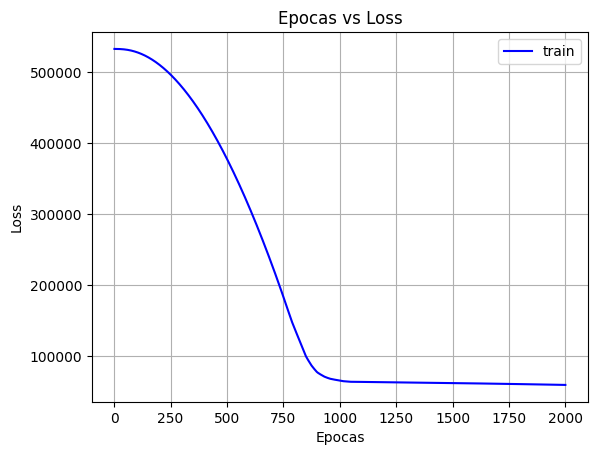

In [ ]:
loss_mae=hist.history["loss"]
loss_mse=hist.history["mse"]

epochs=range(1,len(loss_mae)+1)

plt.plot(epochs,loss_mae,"b",label="train")
plt.legend()

plt.xlabel("Epocas")
plt.ylabel("Loss")
plt.title("Epocas vs Loss")
plt.grid()
plt.show()